In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
# Import necessary libraries
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set path to your root directory
#path = Path('/content/drive/My Drive/ColabNotebooks/chest_xray')
path = Path('/content/drive/MyDrive/chest_xray')
path.ls()

[PosixPath('/content/drive/MyDrive/chest_xray/train'),
 PosixPath('/content/drive/MyDrive/chest_xray/val'),
 PosixPath('/content/drive/MyDrive/chest_xray/chest_xray'),
 PosixPath('/content/drive/MyDrive/chest_xray/__MACOSX'),
 PosixPath('/content/drive/MyDrive/chest_xray/test'),
 PosixPath('/content/drive/MyDrive/chest_xray/models')]

In [ ]:
# We are creating a fastai DataBunch from our dataset
# The transformers are already built into the model
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['NORMAL', 'PNEUMONIA'] 2
5216 624


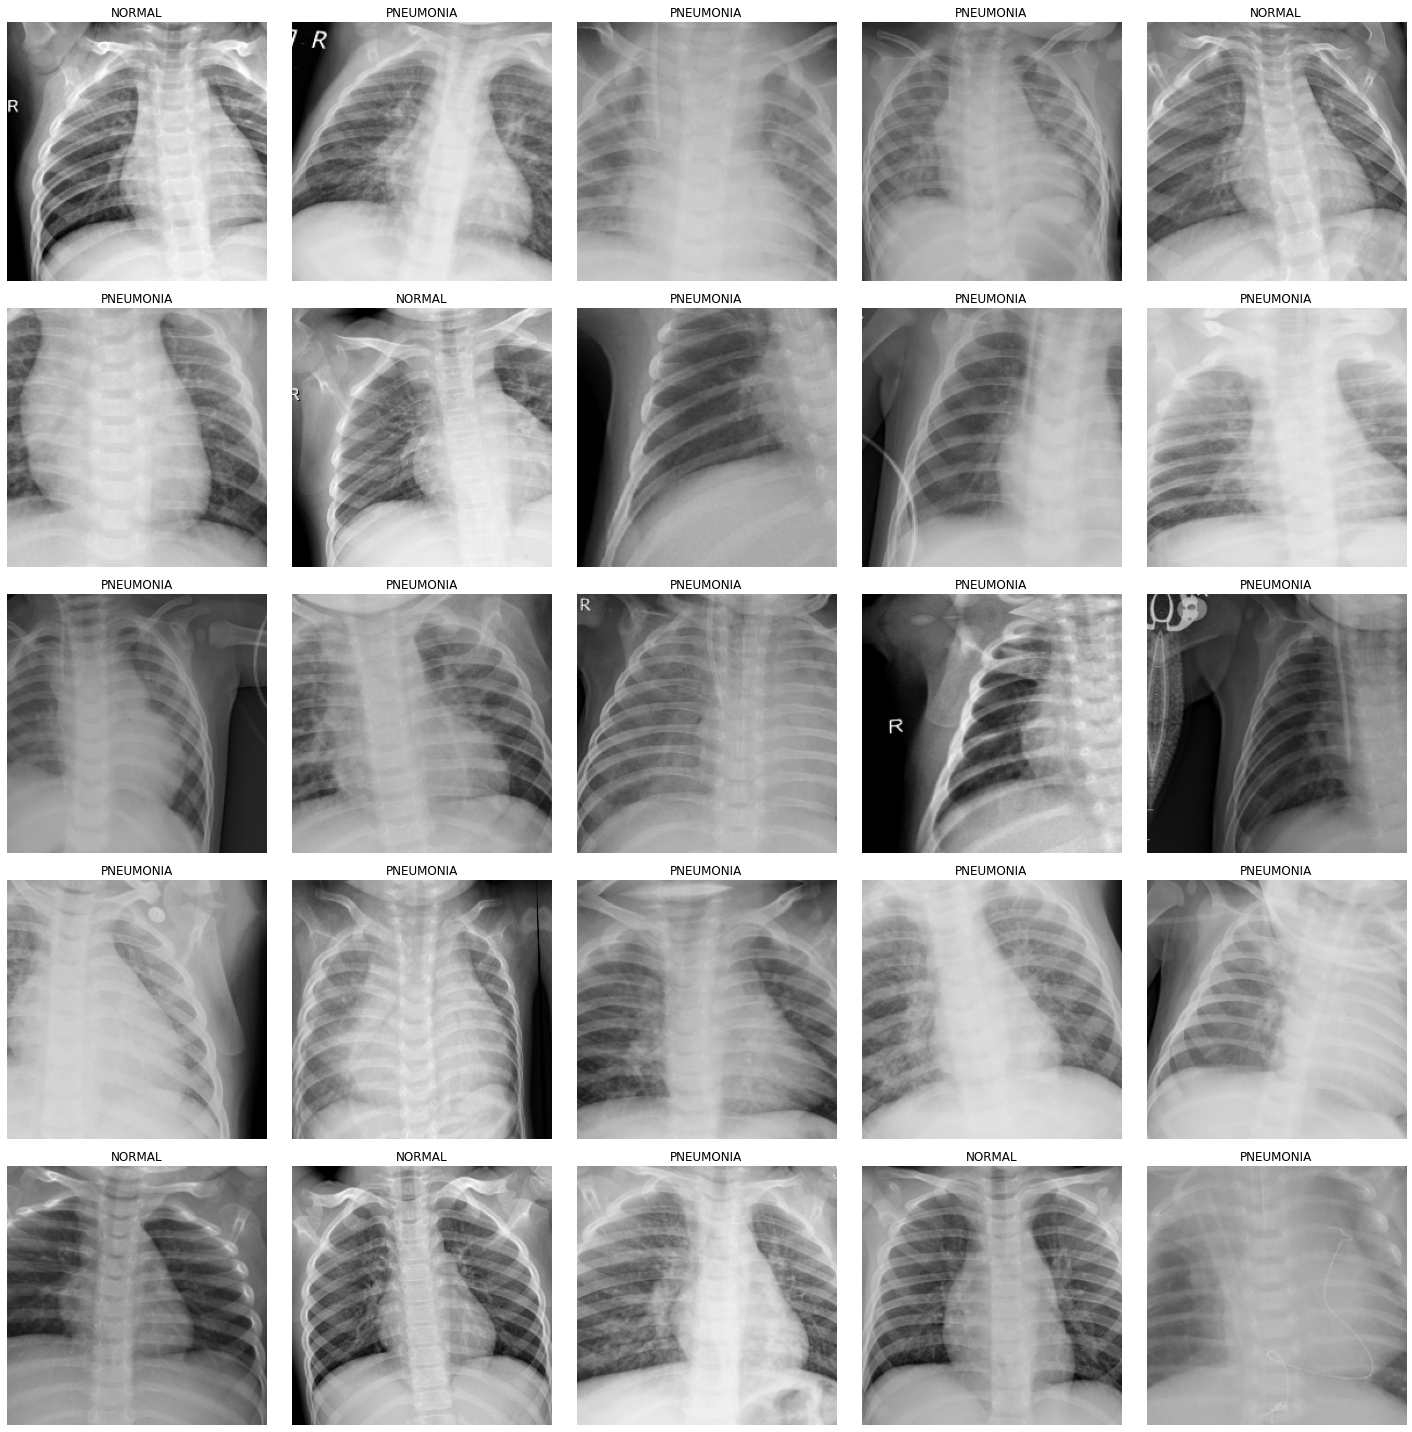

In [ ]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
print(len(data.train_ds), len(data.valid_ds))

In [ ]:
# Build the CNN model with the pretrained resnet34
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
# Train the model on 4 epochs of data at the default learning rate
# Ignore error rate/valid loss data here, decreasing train loss is all that matters
learn.fit_one_cycle(4)

In [ ]:
# Save the model
learn.save('stage-1')

# Load the Model
learn.load('stage-1')

In [ ]:
# Build a Classification Interpretation object from our learn model
interp = ClassificationInterpretation.from_learner(learn)

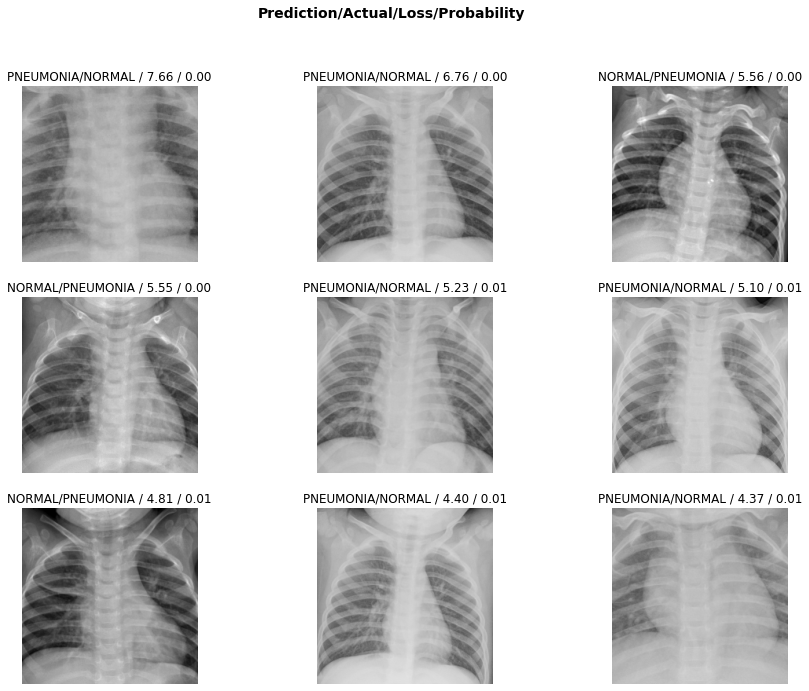

In [ ]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

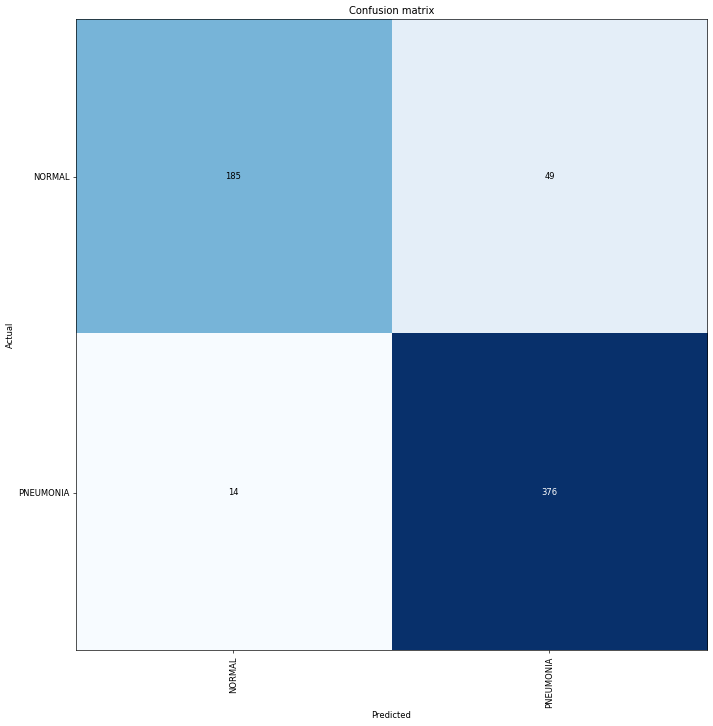

In [ ]:
# Build a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=2)

[('NORMAL', 'PNEUMONIA', 49), ('PNEUMONIA', 'NORMAL', 14)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 6.31E-08


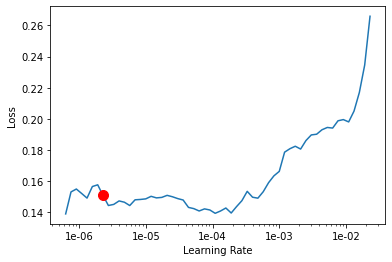

In [ ]:
# Unfreeze all layers of the CNN
learn.unfreeze()

# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model over 2 epochs
learn.fit_one_cycle(2, max_lr=slice(3e-7, 3e-6))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 2.75E-07


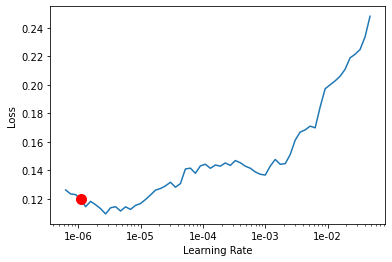

In [ ]:
# See if optimal learning rate changes
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# Fit the model 2 more epochs over all the layers
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

In [ ]:
# Save the model
learn.save('stage-2')

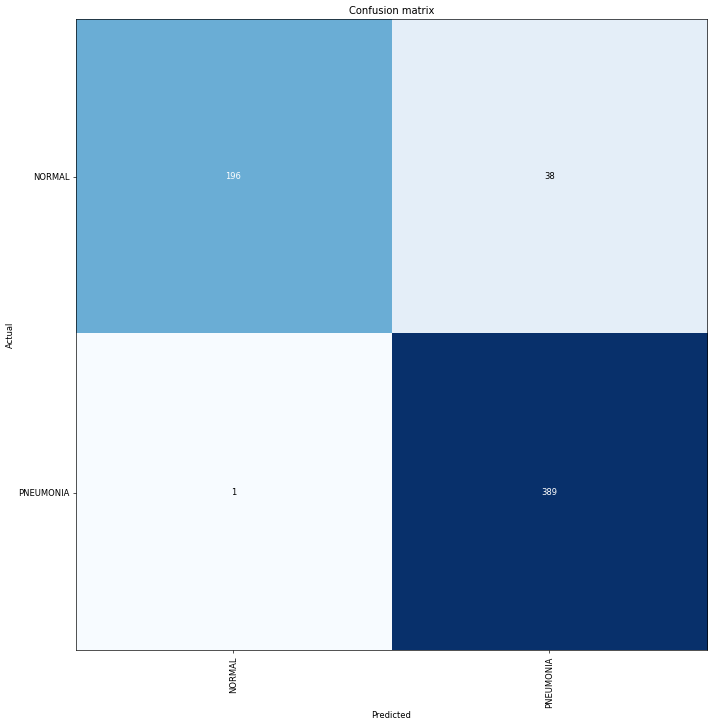

In [ ]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# Save final stage of model
learn.save('stage-2')

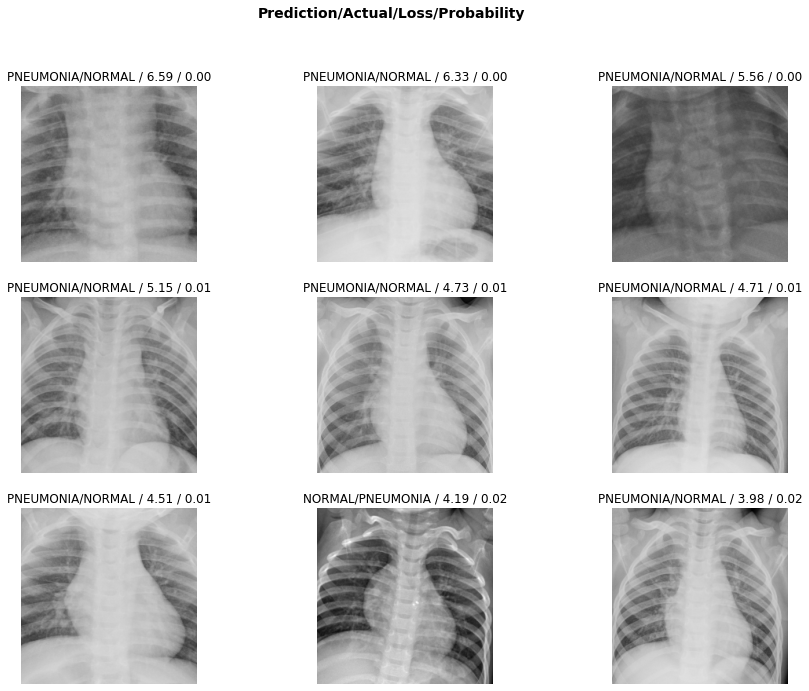

In [ ]:
# Show top 9 images with the highest loss
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
# Build a text version of a confusion matrix-- really helpful with a lot of classes
interp.most_confused(min_val=2)

[('NORMAL', 'PNEUMONIA', 38)]

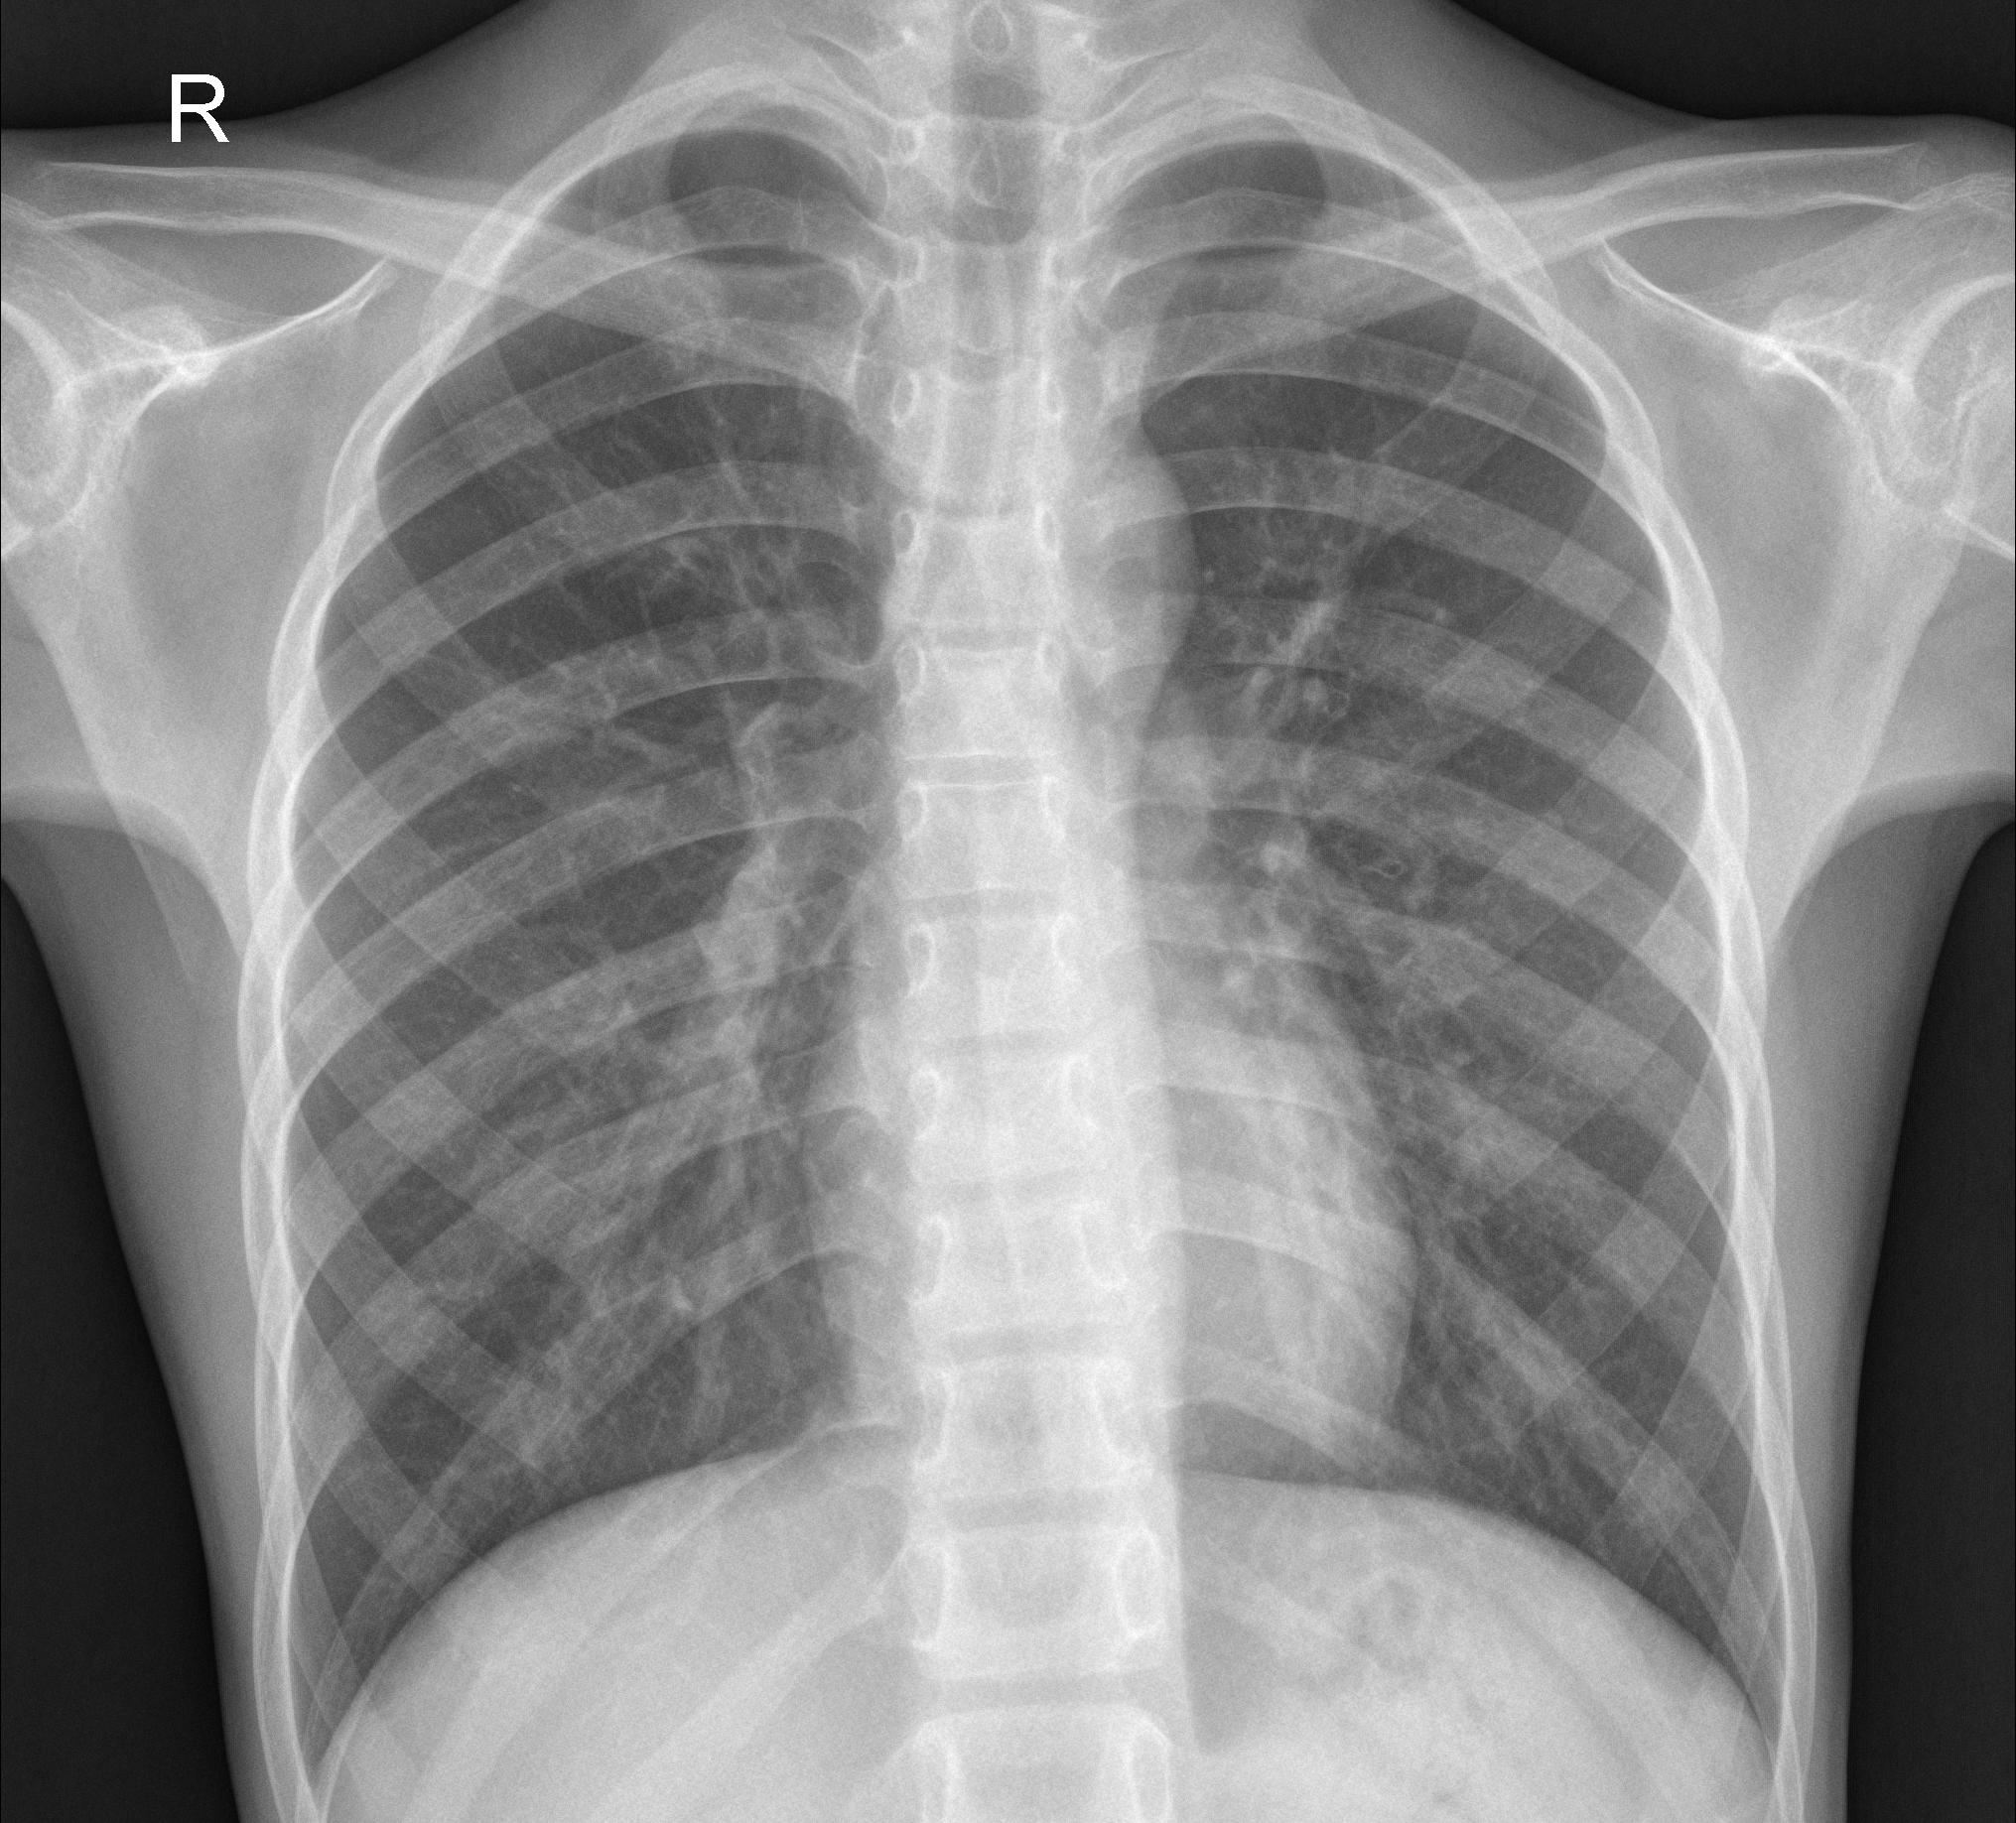

In [ ]:
img = open_image('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0005-0001.jpeg')
img

In [ ]:
classes = ['NORMAL','PNUEMONIA']

In [ ]:
pred_class,_,probs = learn.predict(img)
print(pred_class)
print(f"The prediction rate is : {probs[0].item():.6f}")

NORMAL
The prediction rate is : 0.995857
